<a href="https://colab.research.google.com/github/harshitadd/Celestini/blob/master/ImageManipulate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#!pip install firebase-admin
import firebase_admin
import cv2 
from firebase_admin import credentials 
from google.colab.patches import cv2_imshow
from firebase_admin import storage 
import numpy as np
import matplotlib.pyplot as plt 

In [0]:
cred = credentials.Certificate("credentials.json")

# Initialize the app with a service account, granting admin privileges
app = firebase_admin.initialize_app(cred, {
    'storageBucket': 'fir-4ca2c.appspot.com',
}, name='storage')

In [0]:
##Location - SSCB and DTU : Rotated images 

bucket = storage.bucket(app=app)
blobs = bucket.list_blobs()

#blobs is an interator :google.api_core.page_iterator.HTTPIterator object at 0x7f2cd11c84e0>

imglenovo = [] #has all the lenovo images by their name 
ctr=0
mits = set()
for blob in blobs:
  if blob.name[7:16]=="lenovoinS" :
    if int(blob.name[-8:-6])<19 and int(blob.name[-8:-6])>5:
      blob.download_to_filename('/content/' + "lenovo" + str(blob.name.split('/')[-1])+ '.jpeg')
      imglenovo.append("lenovo" + str(blob.name.split('/')[-1])+ '.jpeg') 
      print("lenovo" + str(blob.name.split('/')[-1])+ '.jpeg')
      ctr+=1
      print(ctr)
    

In [58]:
for img in imglenovo:
  print(img[11:16]>'06')
  break

06-27


read
resized


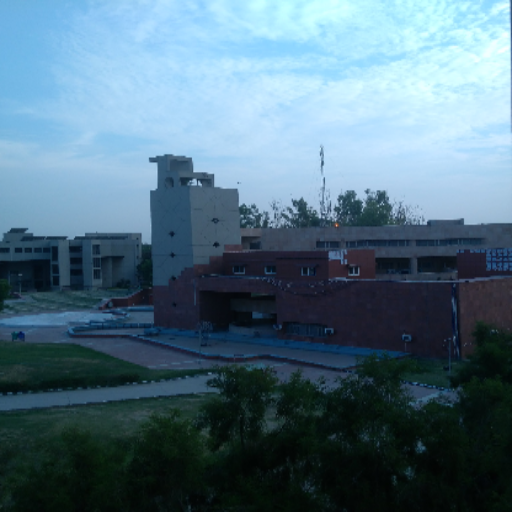

In [56]:
for img in imglenovo:
  if(img == 'lenovo2019-07-03 18:15:07.jpeg'):
    im = cv2.imread(img)
    crop = im[700:3150, 0:3120]
    crop = cv2.resize(crop, (int(np.shape(im)[1]*0.1), int(np.shape(im)[0]*0.1)))
    im = cv2.resize(crop,(512,512))
    im = cv2.rotate(im,rotateCode =cv2.ROTATE_90_COUNTERCLOCKWISE)
    cv2_imshow(im)
    break
    
    
    

  

In [42]:
bucket = storage.bucket(app=app)
blobs = bucket.list_blobs()

imgpb = [] #has all the minote pictures by their name 
ctr=0
mits = set()
for blob in blobs:
  if blob.name.split('/')[1]=="rivers.jpg" :
    if int(blob.name[-8:-6])<19 and int(blob.name[-8:-6])>5:
        print(blob.name)
        blob.download_to_filename('/content/' + "pb" + str(blob.name.split('/')[-1])+ '.jpeg')
        imgpb.append("pb" + str(blob.name.split('/')[-1])+ '.jpeg') 
        print("pb" + str(blob.name.split('/')[-1])+ '.jpeg')
        ctr+=1
        print(ctr)
        break

images/rivers.jpg/2019-07-03 12:46:45
pb2019-07-03 12:46:45.jpeg
1


read
resized


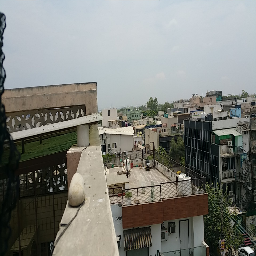

In [48]:
for img in imgpb:
  im = cv2.imread(img)
  print('read')
  im = cv2.resize(im, (256,256))
  print('resized')
  
  im = cv2.rotate(im,rotateCode =cv2.ROTATE_90_CLOCKWISE)
#   rows,cols = im.shape
#   M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
#   dst = cv2.warpAffine(im,M,(cols,rows))
#   print('rotated')
  cv2_imshow(im)
  break
